# Essentials for Data Science: Exam Answer Notebook

June 11th, 2024

Fill the code cells with your answers to the exam questions. You can run the code cells to check if your code is working correctly.  
Please do not add or remove cells in this notebook. This can break the grading process.  
Submit the whole notebook as the `exam.ipynb` file to Brightspace (do not change the file name).
Do not put your name/student-number in the notebook or its file name.

## Question 1: Primitive string encoding and decoding.

In [1]:
def encode(txt, div):
    return sorted( [(idx + ord(l)*div) for idx, l in enumerate(txt)] )
    
encodedNums = encode(txt="Encrypt me, then decrypt me!", div=349)
print(encodedNums)

[11175, 11179, 11184, 11192, 11544, 15366, 24081, 34553, 34570, 34917, 35258, 35263, 35267, 35275, 36309, 38049, 38066, 38391, 38405, 39093, 39110, 39789, 39806, 40490, 40496, 40507, 42233, 42250]


#### Task A: implement the decode function

In [68]:
def decode(encodedNums, div):
    # Create a list to hold the decoded characters
    decoded_chars = [None] * len(encodedNums)
    
    # Sort encoded numbers to ensure decoding in the correct order
    encodedNums_sorted = sorted(encodedNums)

    # Iterate through each sorted encoded number
    for num in encodedNums_sorted:
        # Calculate the original index
        idx = num % div
        # Calculate the sum of the index and the ASCII value of the character
        sum_idx_char = num // div
        # Calculate the ASCII value of the character
        char_value = sum_idx_char - idx
        # Convert the ASCII value back to the character
        char = chr(char_value)
        # Place the character in its original position
        decoded_chars[idx] = char
    
    # Join the characters to form the decoded string
    decoded_string = ''.join(decoded_chars)
    return decoded_string

# Test the decode function
encodedNums = encode(txt="Encrypt me, then decrypt me!", div=349)
decoded_string = decode(encodedNums, 349)
print(decoded_string)  # This should output: Encrypt me, then decrypt me!

Emaoukne\"h[W_SSP^dZTK


#### Task B: test the decode function

In [69]:
# Test the encode and decode functions
def test_encode_decode():
    texts = ["This is a test message.", "Another example text here."]
    div = 349

    for text in texts:
        encoded = encode(text, div)
        decoded = decode(encoded, div)
        assert text == decoded, f"Failed: {text} != {decoded}"

    print("All tests passed.")

test_encode_decode()



AssertionError: Failed: This is a test message. != TggpdmYjZgg^UbaNSP

#### Task C: find the secret key and message

In [ ]:
# Find the secret key and put it instead of `???`

div = ???
print(
    decode(
        encodedNums = [25508, 25511, 25519, 25526, 25529, 46240, 50238, 63776, 65380, 69339, 
            77311, 78114, 80506, 80509, 82889, 82907, 83690, 87691, 88487, 88490, 90871, 
            90882, 91661, 92455, 92462, 92463, 92470, 96454], 
        div=div
    )
)

## Question 2: Calculating average grades.

In [13]:
import json
import numpy as np
import pandas as pd

# Load the names.txt file
with open('names.txt', 'r', encoding='utf-8') as file:
    registered_names = [line.strip() for line in file]

# Load the grades.json file
with open('grades.json', 'r', encoding='utf-8') as file:
    grades_data = json.load(file)

# Create a dictionary to store the results (registered students first)
results = {name: {'N': 0, 'Mean': np.nan, 'Extra': True, 'Name': name} for name in registered_names}

# Process the grades data
for entry in grades_data:
    name = entry['name']
    grades = entry['grades']
    mean_grade = np.mean(grades)
    n_grades = len(grades)
    
    # When registered student
    if name in results:

        # If first occurence
        if np.isnan(results[name]['Mean']):
            results[name]['Mean'] = mean_grade
            results[name]['N'] = n_grades

       
        else:
            combined_grades = results[name]['N'] * results[name]['Mean'] + n_grades * mean_grade
            results[name]['N'] += n_grades
            results[name]['Mean'] = combined_grades / results[name]['N']
    
    # If student is not registered
    else:
        results[name] = {'N': n_grades, 'Mean': mean_grade, 'Extra': False, 'Name': name}

# Convert the results to a DataFrame
df_registered = pd.DataFrame([results[name] for name in registered_names])
df_unregistered = pd.DataFrame([results[name] for name in results if name not in registered_names])

# Concatenate the DataFrames
df = pd.concat([df_registered, df_unregistered])

# Convert to the expected output format
df['Mean'] = df['Mean'].round(1)
df['N'] = df['N'].astype(int)


df


,N,Mean,Extra,Name
0,0,NaN,True,Grzegorz Vieira
1,0,NaN,True,Meindert Dekker
2,3,7.0,True,Zygfryd Cruz
3,2,7.0,True,Roseann Dąbrowski
4,3,7.0,True,Lyda Bos
5,1,6.5,True,Susanna Sousa
6,4,7.6,True,Meindert Hoffmann
7,2,7.2,True,Ursula Bakker
8,3,7.0,True,Grant Becker
9,4,8.0,True,Jade Bos


## Question 3: Elapsed days.

In [23]:
def elapsedDays(startYear, startMonth, startDay, endYear, endMonth, endDay):
    """
    Calculate the number of days between two dates.
    
    Parameters:
    startYear (int): The start year
    startMonth (int): The start month
    startDay (int): The start day
    endYear (int): The end year
    endMonth (int): The end month
    endDay (int): The end day
    
    Returns:
    int: Number of days between the start date and the end date
    
    Raises:
    ValueError: If the end date is before the start date or if the dates are not valid.
    """
    
    def is_leap_year(year):
        """Determine if a given year is a leap year."""
        return year % 4 == 0 and (year % 100 != 0 or year % 400 == 0)
    
    def days_in_month(year, month):
        """Return the number of days in a given month of a given year."""
        if month in [4, 6, 9, 11]:
            return 30
        elif month == 2:
            return 29 if is_leap_year(year) else 28
        else:
            return 31
    
    def day_of_year(year, month, day):
        """Calculate the day of the year for a given date."""
        if month < 1 or month > 12 or day < 1 or day > days_in_month(year, month):
            raise ValueError("Invalid date")
        days = sum(days_in_month(year, m) for m in range(1, month)) + day
        return days
    
    # Ensure start date is not after end date
    if (startYear, startMonth, startDay) > (endYear, endMonth, endDay):
        raise ValueError("End date is before start date")
    
    # Calculate days from start date to end of the year
    start_days = 365 * startYear + sum(day_of_year(y, 12, 31) for y in range(1583, startYear)) + day_of_year(startYear, startMonth, startDay)
    
    # Calculate days from start of the year to end date
    end_days = 365 * endYear + sum(day_of_year(y, 12, 31) for y in range(1583, endYear)) + day_of_year(endYear, endMonth, endDay)
    
    return end_days - start_days

# Example test cases
print(elapsedDays(2021, 1, 1, 2021, 1, 1))  # should be 0
print(elapsedDays(2021, 1, 1, 2021, 1, 2))  # should be 1
print( elapsedDays(2021, 1, 1, 2021, 1, 1) == 0 )


0
1
True


## Question 4: Data manipulation and visualisation.

In [24]:
import numpy as np
import pandas as apd
import seaborn as sb
import matplotlib.pyplot as plt

In [25]:
# Import 
apidae = pd.read_csv('apidae.csv', parse_dates=['eventDate'])

### 4.A. Table Summary

In [30]:
# Generate the summary table
summary = pd.DataFrame({
    'Variable': apidae.columns,
    'Distinct Values': [apidae[col].nunique(dropna=False) for col in apidae.columns],
    'No Missing Values': ['(*)' if not apidae[col].isna().any() else '' for col in apidae.columns]
})

# Display the summary without indices and column names
print(summary.to_string(index=False, header=False))

          family     1 (*)
           genus    13    
         species    90    
   stateProvince    22    
 individualCount    93    
    occurrenceID 70264    
 decimalLatitude   989    
decimalLongitude  1047    
       eventDate 11749 (*)


### 4.B. Query: Number of distinct species per province

In [31]:
# Produce the counts of the numbers of different species per province
species_per_province = apidae.groupby('stateProvince')['species'].nunique()

# Sort the output by the number of species in descending order
sorted_species_per_province = species_per_province.sort_values(ascending=False)

# Convert to DataFrame for display
sorted_species_per_province_df = sorted_species_per_province.reset_index()

# Display the summary without indices and column names
print(sorted_species_per_province_df.to_string(index=False, header=False))

                   Limburg 82
                Gelderland 72
             Noord-Brabant 67
                   Utrecht 61
              Zuid-Holland 54
                Overijssel 54
                   Zeeland 47
             Noord-Holland 44
                 Friesland 42
                   Drenthe 41
                 Groningen 35
       Friesland, Vlieland 22
   Friesland, Terschelling 22
        Friesland, Ameland 21
     Limburg, Zuid-Limburg 21
                 Flevoland 19
      Noord-Holland, Texel 16
Zeeland, Zeeuws-Vlaanderen 14
   Noord-Holland, Het Gooi 11
        Overijssel, Twente 10
Friesland, Schiermonnikoog 10


### 4.C. Query: Which species is the most common in Noord-Holland?

In [32]:
# Filter the data for Noord-Holland
noord_holland_data = apidae[apidae['stateProvince'] == 'Noord-Holland']

# Group by species and sum the individual counts
species_counts = noord_holland_data.groupby('species')['individualCount'].sum()

# Identify the species with the highest total number of individual counts
most_common_species = species_counts.idxmax()
most_common_species_count = species_counts.max()

# Display the result
print(f"The most common species in Noord-Holland is {most_common_species} with a total of {most_common_species_count} individual counts observed.")

The most common species in Noord-Holland is Apis mellifera with a total of 40096.0 individual counts observed.


### 4.D. Query: Percentages


In [37]:
# Filter out rows with missing values in stateProvince or individualCount columns
filtered_data = apidae.dropna(subset=['stateProvince', 'individualCount'])

# Calculate the total number of individuals
total_individuals = filtered_data['individualCount'].sum()

# Calculate the total number of individuals per province
individuals_per_province = filtered_data.groupby('stateProvince')['individualCount'].sum()

# Calculate the percentage of individuals per province
percentages = (individuals_per_province / total_individuals) * 100

# Sort the percentages in descending order
sorted_percentages = percentages.sort_values(ascending=False)

# Convert to DataFrame for display
sorted_percentages_df = sorted_percentages.reset_index()
sorted_percentages_df.columns = ['stateProvince', 'Percentage']

# Display the summary without indices and column names
print(sorted_percentages_df.to_string(index=False, header=True))


## test
cumsumperc = sorted_percentages_df["Percentage"].sum()

print(f"\nThe sum of the percentages of the provinces add up to:", cumsumperc)

             stateProvince  Percentage
              Zuid-Holland   22.556752
                   Utrecht   12.612995
                Gelderland   11.833657
             Noord-Holland   11.438718
                   Drenthe   10.830380
             Noord-Brabant    7.562878
                Overijssel    5.539458
                   Limburg    5.363070
                 Flevoland    5.210576
                 Friesland    2.731312
                 Groningen    1.943542
                   Zeeland    1.654950
   Friesland, Terschelling    0.181307
     Limburg, Zuid-Limburg    0.164909
       Friesland, Vlieland    0.114312
        Friesland, Ameland    0.095104
      Noord-Holland, Texel    0.070040
        Overijssel, Twente    0.037245
Friesland, Schiermonnikoog    0.022253
   Noord-Holland, Het Gooi    0.018740
Zeeland, Zeeuws-Vlaanderen    0.017803

The sum of the percentages of the provinces add up to: 99.99999999999999


### 4.E. Cross tabulation

In [39]:
# Filter observations on genus Anthophora
anthophora_data = apidae[apidae['genus'] == 'Anthophora']

# Produce a cross-tabulation of the total number of individuals per species (in columns) and per provinces (in rows)
cross_tab = pd.pivot_table(anthophora_data, values='individualCount', index='stateProvince', columns='species', aggfunc='sum', fill_value=0)

# Convert to DataFrame for display
cross_tab_df = cross_tab.reset_index()

# Display the cross-tabulation
print(cross_tab_df.to_string(index=False))


stateProvince  Anthophora bimaculata  Anthophora furcata  Anthophora plagiata  Anthophora plumipes  Anthophora quadrimaculata  Anthophora retusa
      Drenthe                    0.0                 4.0                  0.0                  6.0                        0.0                0.0
    Flevoland                    0.0                 0.0                  0.0                  6.0                        0.0                0.0
    Friesland                    0.0                 1.0                  0.0                 29.0                        0.0                0.0
   Gelderland                    3.0                17.0                  0.0                148.0                        0.0               16.0
    Groningen                    0.0                 2.0                  0.0                 23.0                        0.0                0.0
      Limburg                   12.0                21.0                  0.0                 27.0                       26.0     

### 4.F. Scatterplot

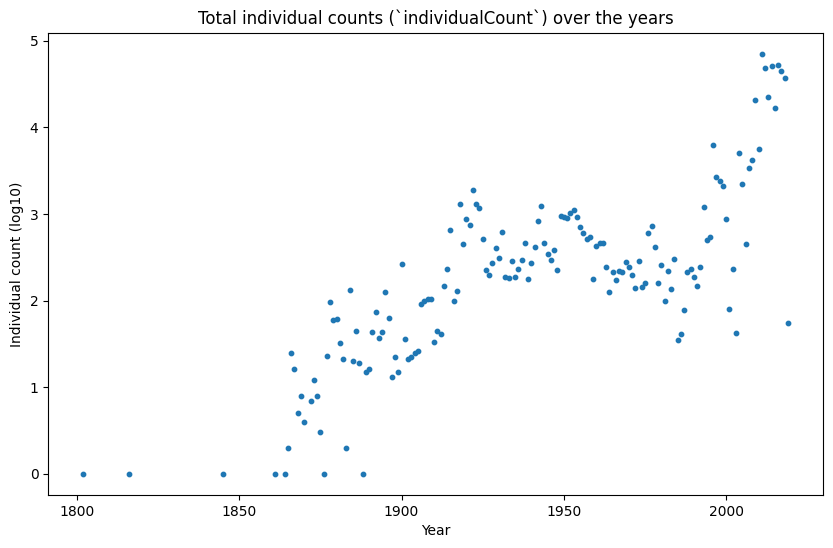

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the apidae dataset with eventDate parsed as datetime
apidae = pd.read_csv('apidae.csv', parse_dates=['eventDate'])

# Extract the year from the eventDate
apidae['year'] = apidae['eventDate'].dt.year

# Group by year and sum the individual counts
yearly_counts = apidae.groupby('year')['individualCount'].sum()

# Apply log10 transformation
log_counts = np.log10(yearly_counts)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(log_counts.index, log_counts.values, s=10)

# Set the titles and labels
plt.title("Total individual counts (`individualCount`) over the years")
plt.xlabel("Year")
plt.ylabel("Individual count (log10)")

# Display the plot
plt.show()


### 4.G. Geolocation scatterplot

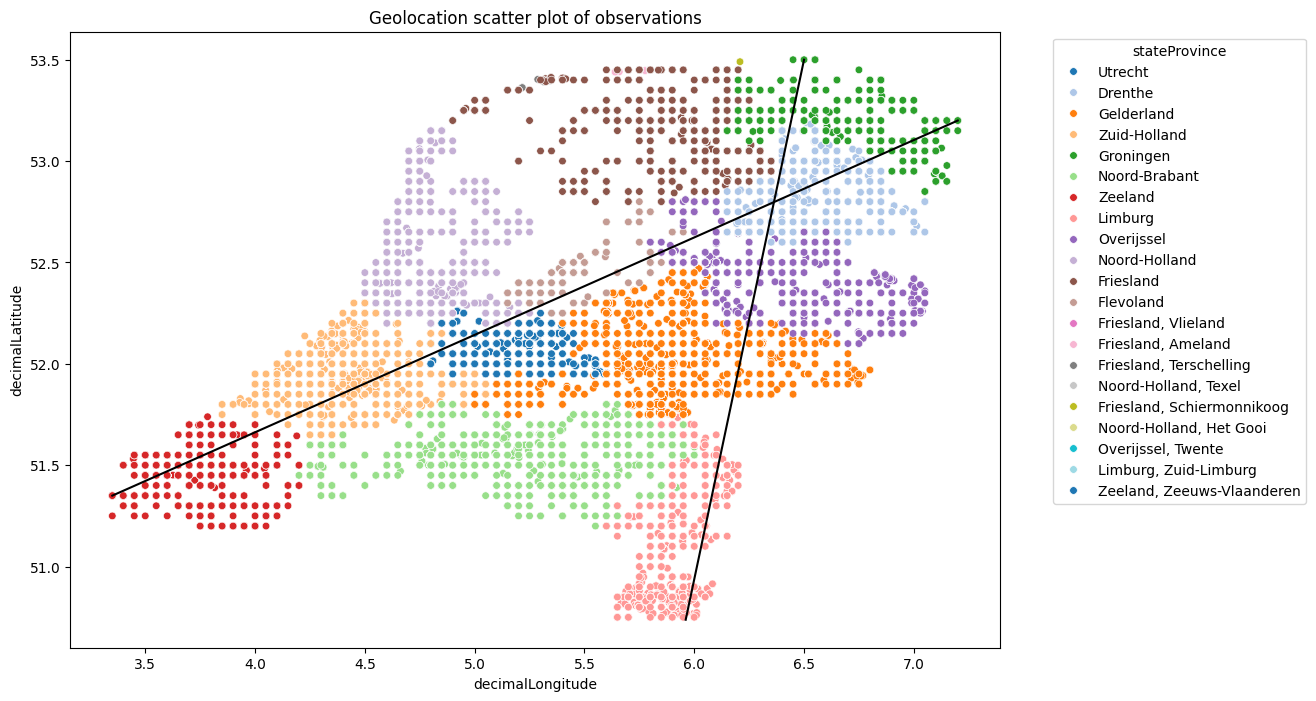

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the apidae dataset with eventDate parsed as datetime
apidae = pd.read_csv('apidae.csv', parse_dates=['eventDate'])

# Scatter plot for geolocation with colors by stateProvince
plt.figure(figsize=(12, 8))
sns.scatterplot(data=apidae, x='decimalLongitude', y='decimalLatitude', hue='stateProvince', palette='tab20', s=30, legend='full')

# Finding the extreme points
most_eastern = apidae.loc[apidae['decimalLongitude'].idxmax()]
most_western = apidae.loc[apidae['decimalLongitude'].idxmin()]
most_northern = apidae.loc[apidae['decimalLatitude'].idxmax()]
most_southern = apidae.loc[apidae['decimalLatitude'].idxmin()]

# Plotting the extreme points connections
plt.plot([most_western['decimalLongitude'], most_eastern['decimalLongitude']],
         [most_western['decimalLatitude'], most_eastern['decimalLatitude']], color='black')
plt.plot([most_northern['decimalLongitude'], most_southern['decimalLongitude']],
         [most_northern['decimalLatitude'], most_southern['decimalLatitude']], color='black')

# Set titles and labels
plt.title('Geolocation scatter plot of observations')
plt.xlabel('decimalLongitude')
plt.ylabel('decimalLatitude')
plt.legend(title='stateProvince', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()
